#                                             PROBLEMA DEL COLOREADO DE GRAFOS (INTERFAZ GRÁFICA)

### Este trabajo ha sido realizado por:

- David Iglesias Dominguez
- Joaquin García Macías

En este notebook, presentamos la interfaz gráfica que implementa el problema de coloreado de grafos, con la opción de elegir entre varios tipos de grafos (incluido que se genere uno aleatorio), seleccionando su número de vértices y los parámetros necesarios para el Algoritmo Genético, ya sea el genérico (con mutaciones) o con un paso de Enfriamiento Simulado en vez de las mutaciones.

Para iniciar la interfaz gráfica, simplemente ejecute la celda a continuación.

C:\ProgramData\Anaconda3\lib\site-packages\deap-1.2.2-py3.6.egg\deap\creator.py:141: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
C:\ProgramData\Anaconda3\lib\site-packages\deap-1.2.2-py3.6.egg\deap\creator.py:141: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.


gen	nevals
0  	20    
1  	15    
2  	16    
3  	9     
4  	15    
5  	15    
6  	15    
7  	13    
8  	14    
9  	17    
10 	15    
11 	8     
12 	14    
13 	14    
14 	17    
15 	14    
16 	12    
17 	10    
18 	9     
19 	16    
20 	14    
21 	8     
22 	13    
23 	12    
24 	13    
25 	14    
26 	9     
27 	14    
28 	14    
29 	9     
30 	8     
31 	11    
32 	17    
33 	15    
34 	13    
35 	7     
36 	12    
37 	14    
38 	11    
39 	16    
40 	13    
41 	9     
42 	14    
43 	9     
44 	9     
45 	14    
46 	9     
47 	14    
48 	17    
49 	15    
50 	18    
gen	nevals
0  	20    
1  	20    
2  	20    
3  	20    
4  	20    
5  	20    
6  	20    
7  	20    
8  	20    
9  	20    
10 	20    
11 	20    
12 	20    
13 	20    
14 	20    
15 	20    
16 	20    
17 	20    
18 	20    
19 	20    
20 	20    
21 	20    
22 	20    
23 	20    
24 	20    
25 	20    
26 	20    
27 	20    
28 	20    
29 	20    
30 	20    
31 	20    
32 	20    
33 	20    
34 	20    
35 	20    
36 	20    
37 	20    

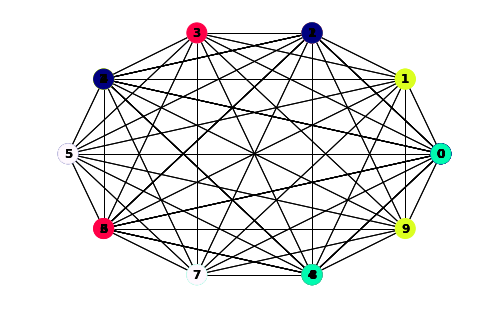

In [5]:
from tkinter import *
import random
from deap import base, creator, tools, algorithms
import numpy
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
from simanneal import Annealer

# Configuracion de la ventana

window = Tk()
window.title("Coloreado de Grafos")
window.geometry('650x700')

# Aqui se declaran todos los campos necesarios

L1 = Label(text="Bienvenido a la app para el coloreado de grafos utilizando Algoritmos Genéticos", fg="black")
L1.grid(column=1, row=1, columnspan=10, sticky=W)

L2 = Label(text="Seleccione el nombre del grafo a utilizar (Opciones: aleatorio, petersen, tutte, sedgewick_maze, tetrahedral, completo)", fg="black")
L2.grid(column=1, row=2, columnspan=10, sticky=W)

L3 = Label(text="Nombre del grafo:", fg="red")
L3.grid(column=1, row=3, sticky=W)
nombreGrafo = Entry(window,width=30) 
nombreGrafo.grid(column=2, row=3, sticky=W)

L4 = Label(text="Si ha seleccionado un grafo aleatorio o uno completo, introduzca el número de vértices y la probabilidad de existencia", fg="black")
L4.grid(column=1, row=4, columnspan=10, sticky=W)

L5 = Label(text="de los ejes entre estos (solo para el grafo aleatorio)", fg="black")
L5.grid(column=1, row=5, columnspan=10, sticky=W)

L6 = Label(text="Número de vértices:", fg="red")
L6.grid(column=1, row=6, sticky=W)
nodos = Entry(window,width=30)
nodos.grid(column=2, row=6, sticky=W)

L7 = Label(text="Densidad de ejes:", fg="red")
L7.grid(column=1, row=7, sticky=W)
densidad = Entry(window,width=30)
densidad.grid(column=2, row=7, sticky=W)

L8 = Label(text="A continuación, introduzca el resto de datos necesarios y haga click en el botón correspondiente para usar un Algoritmo", fg="black")
L8.grid(column=1, row=8, columnspan=10, sticky=W)

L9 = Label(text="Genético con Enfriamiento Simulado o Genérico (con mutaciones)", fg="black")
L9.grid(column=1, row=9, columnspan=10, sticky=W)

L10 = Label(text="Número de Colores:", fg="red")
L10.grid(column=1, row=10, sticky=W)
colores = Entry(window,width=30)
colores.grid(column=2, row=10, sticky=W)

L11 = Label(text="Número de Individuos/Población:", fg="red")
L11.grid(column=1, row=11, sticky=W)
individuos = Entry(window,width=30)
individuos.grid(column=2, row=11, sticky=W)

L12 = Label(text="Número de Generaciones:", fg="red")
L12.grid(column=1, row=12, sticky=W)
generaciones = Entry(window,width=30)
generaciones.grid(column=2, row=12, sticky=W)

L13 = Label(text="Probabilidad de Cruzamiento:", fg="red")
L13.grid(column=1, row=13, sticky=W)
cruzamiento = Entry(window,width=30)
cruzamiento.grid(column=2, row=13, sticky=W)

L14 = Label(text="Probabilidad de Mutación:", fg="red")
L14.grid(column=1, row=14, sticky=W)
mutacion = Entry(window,width=30)
mutacion.grid(column=2, row=14, sticky=W)

# Código para el Algoritmo Genético

global grafo
global numNodos
if nombreGrafo.get() == 'aleatorio':
    grafo = nx.erdos_renyi_graph(int(nodos.get()), float(densidad.get()))
    numNodos = int(nodos.get())
elif nombreGrafo.get() == 'petersen':
    grafo = nx.petersen_graph()
    numNodos = 10
elif nombreGrafo.get() == 'tutte':
    grafo = nx.tutte_graph()
    numNodos = 46
elif nombreGrafo.get() == 'sedgewick_maze':
    grafo = nx.sedgewick_maze_graph()
    numNodos = 8
elif nombreGrafo.get() == 'tetrahedral':
    grafo = nx.tetrahedral_graph()
    numNodos = 4
elif nombreGrafo.get() == 'completo':
    grafo = nx.complete_graph(int(nodos.get()))
    numNodos = int(nodos.get())

G=globals()
def fenotipo(individuo):
    res = []
    for i in range(1,int(colores.get())+1):
        G["P%d"%i] = []
        for j in range(numNodos): 
            if individuo[j] == i:
                G["P%d"%i].append(j)
    for i in range(1,int(colores.get())+1):
        res += G["P%d"%i],
    return (res)

def evaluar_individuo(individuo):
    fenotipo(individuo)
    penalizacion = 0
    for i in range(1,int(colores.get())+1):
        for j in range(len(G["P%d"%i])):
            for k in range(j+1,len(G["P%d"%i])):
                if compruebaVertice(G["P%d"%i][j],G["P%d"%i][k]):
                    penalizacion += 1000
    return (penalizacion,)

def compruebaVertice(a, b):
    res = False
    if b in list(grafo.neighbors(a)):
        res = True
    return res

def varAnd(population, toolbox, cxpb, mutpb):
    offspring = [toolbox.clone(ind) for ind in population]

    for i in range(1, len(offspring), 2):
        if random.random() < cxpb:
            offspring[i - 1], offspring[i] = toolbox.mate(offspring[i - 1],
                                                          offspring[i])
            del offspring[i - 1].fitness.values, offspring[i].fitness.values

    for i in range(len(offspring)):
        if random.random() < mutpb:
            offspring[i], = toolbox.mutate(offspring[i])
            del offspring[i].fitness.values

    return offspring

def eaSimple(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])
    
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print (logbook.stream)

    for gen in range(1, ngen + 1):
        offspring = toolbox.select(population, len(population))

        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        if halloffame is not None:
            halloffame.update(offspring)

        population[:] = offspring

        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print (logbook.stream)

    return population, logbook

class GraphColorProblem(Annealer):

    def __init__(self, state):
        super(GraphColorProblem, self).__init__(state)  # important!

    def move(self):
        a = random.randint(0, len(self.state) - 1)
        self.state[a] = random.randint(1,3) 

    def energy(self):
        fenotipo(self.state)
        penalizacion = 0
        for i in range(1,int(colores.get())+1):
            for j in range(len(G["P%d"%i])):
                for k in range(j+1,len(G["P%d"%i])):
                    if compruebaVertice(G["P%d"%i][j],G["P%d"%i][k]):
                        penalizacion += 1000
        return penalizacion
    
def varAndEnfriamiento(population, toolbox, cxpb):
    offspring = [toolbox.clone(ind) for ind in population]

    for i in range(1, len(offspring), 2):
        if random.random() < cxpb:
            offspring[i - 1], offspring[i] = toolbox.mate(offspring[i - 1],
                                                          offspring[i])
            del offspring[i - 1].fitness.values, offspring[i].fitness.values

    for i in range(len(offspring)):
        init_state = offspring[i]
        gcp = GraphColorProblem(init_state)
        gcp.steps = 1
        gcp.updates = 0
        gcp.copy_strategy = "slice"
        state, e = gcp.anneal()
        for j in range(len(offspring[i])):
            offspring[i][j] = state[j]
        del offspring[i].fitness.values

    return offspring

def eaSimpleEnfriamiento(population, toolbox, cxpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])
    
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print (logbook.stream)

    for gen in range(1, ngen + 1):
        offspring = toolbox.select(population, len(population))

        offspring = varAndEnfriamiento(offspring, toolbox, cxpb)

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        if halloffame is not None:
            halloffame.update(offspring)

        population[:] = offspring

        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print (logbook.stream)

    return population, logbook

# Aquí debe ir la función que se ejecute cuando se haga click al botón

def enfriamientoSimulado():
    global grafo
    global numNodos
    if nombreGrafo.get() == 'aleatorio':
        grafo = nx.erdos_renyi_graph(int(nodos.get()), float(densidad.get()))
        numNodos = int(nodos.get())
    elif nombreGrafo.get() == 'petersen':
        grafo = nx.petersen_graph()
        numNodos = 10
    elif nombreGrafo.get() == 'tutte':
        grafo = nx.tutte_graph()
        numNodos = 46
    elif nombreGrafo.get() == 'sedgewick_maze':
        grafo = nx.sedgewick_maze_graph()
        numNodos = 8
    elif nombreGrafo.get() == 'tetrahedral':
        grafo = nx.tetrahedral_graph()
        numNodos = 4
    elif nombreGrafo.get() == 'completo':
        grafo = nx.complete_graph(int(nodos.get()))
        numNodos = int(nodos.get())
        
    creator.create('Fitness', base.Fitness, weights=(-1.0,))
    creator.create('Individuo', list, fitness = creator.Fitness)
    caja_de_herramientas = base.Toolbox()
    caja_de_herramientas.register('gen', random.randint, 1, int(colores.get()))
    caja_de_herramientas.register('individuo', tools.initRepeat,
                              container=creator.Individuo, func=caja_de_herramientas.gen, n=numNodos)
    caja_de_herramientas.register('población', tools.initRepeat,
                              container=list, func=caja_de_herramientas.individuo, n=int(individuos.get()))
        
    caja_de_herramientas.register('evaluate', evaluar_individuo)
    
    caja_de_herramientas.register('mate', tools.cxOnePoint)
    caja_de_herramientas.register('mutate', tools.mutShuffleIndexes, indpb=0.1)
    
    caja_de_herramientas.register('select', tools.selTournament, tournsize=1)

    random.seed(12345)
    población_inicial = caja_de_herramientas.población()
    
    salón_fama = tools.HallOfFame(1)

    población, registro = eaSimpleEnfriamiento(población_inicial,
                                          caja_de_herramientas,
                                          cxpb=float(cruzamiento.get()),
                                          ngen=int(generaciones.get()), 
                                          halloffame=salón_fama)
    
    solucion = salón_fama[0]
    nx.draw_shell(grafo, with_labels=True, font_weight='bold', node_color=solucion, node_size=400, cmap=plt.cm.gist_ncar)
    plt.savefig("path.png")
    res = 'La mejor solucion encontrada ha sido: Individuo: {1}; Fitness: {0}'.format(
            solucion.fitness.values[0], solucion)
    L16 = Label(text=res, fg="blue")
    L16.grid(column=1, row=16, columnspan=10, sticky=W)
    
    load = Image.open("path.png")
    render = ImageTk.PhotoImage(load)

    img = Label(image=render)
    img.image = render
    img.grid(column=1, row=18, columnspan=10, rowspan=10)

# Botón que se ejecuta

boton = Button(window, text="Enfriamiento Simulado", command=enfriamientoSimulado)
 
boton.grid(column=1, row=15)

# Aquí debe ir la función que se ejecute cuando se haga click al botón

def mutacionGenerica():
    global grafo
    global numNodos
    if nombreGrafo.get() == 'aleatorio':
        grafo = nx.erdos_renyi_graph(int(nodos.get()), float(densidad.get()))
        numNodos = int(nodos.get())
    elif nombreGrafo.get() == 'petersen':
        grafo = nx.petersen_graph()
        numNodos = 10
    elif nombreGrafo.get() == 'tutte':
        grafo = nx.tutte_graph()
        numNodos = 46
    elif nombreGrafo.get() == 'sedgewick_maze':
        grafo = nx.sedgewick_maze_graph()
        numNodos = 8
    elif nombreGrafo.get() == 'tetrahedral':
        grafo = nx.tetrahedral_graph()
        numNodos = 4
    elif nombreGrafo.get() == 'completo':
        grafo = nx.complete_graph(int(nodos.get()))
        numNodos = int(nodos.get())
    
    creator.create('Fitness', base.Fitness, weights=(-1.0,))
    creator.create('Individuo', list, fitness = creator.Fitness)
    caja_de_herramientas = base.Toolbox()
    caja_de_herramientas.register('gen', random.randint, 1, int(colores.get()))
    caja_de_herramientas.register('individuo', tools.initRepeat,
                              container=creator.Individuo, func=caja_de_herramientas.gen, n=numNodos)
    caja_de_herramientas.register('población', tools.initRepeat,
                              container=list, func=caja_de_herramientas.individuo, n=int(individuos.get()))

    caja_de_herramientas.register('evaluate', evaluar_individuo)

    caja_de_herramientas.register('mate', tools.cxOnePoint)
    caja_de_herramientas.register('mutate', tools.mutShuffleIndexes, indpb=0.1)

    caja_de_herramientas.register('select', tools.selTournament, tournsize=1)

    random.seed(12345)
    población_inicial = caja_de_herramientas.población()

    salón_fama = tools.HallOfFame(1)
    
    población_final, registro = eaSimple(población_inicial,
                                    caja_de_herramientas,
                                    cxpb=float(cruzamiento.get()), 
                                    mutpb=float(mutacion.get()),  
                                    ngen=int(generaciones.get()), 
                                    halloffame=salón_fama)
    
    
    solucion = salón_fama[0]
    nx.draw_shell(grafo, with_labels=True, font_weight='bold', node_color=solucion, node_size=400, cmap=plt.cm.gist_ncar)
    plt.savefig("path.png")
    res = 'La mejor solucion encontrada ha sido: Individuo: {1}; Fitness: {0}'.format(
            solucion.fitness.values[0], solucion)
    L16 = Label(text=res, fg="blue")
    L16.grid(column=1, row=16, columnspan=10, sticky=W)
    
    load = Image.open("path.png")
    render = ImageTk.PhotoImage(load)

    img = Label(image=render)
    img.image = render
    img.grid(column=1, row=18, columnspan=10, rowspan=10)
    
# Botón que se ejecuta

boton = Button(window, text="Mutación Genérica", command=mutacionGenerica)
 
boton.grid(column=2, row=15)

L17 = Label(text='© 2018 David Iglesias y Joaquín García - Universidad de Sevilla', fg="grey")
L17.place(x=150, y=650)


## Esto básicamente hace que se ejecute la interfaz

window.mainloop()